In [1]:
import numpy as np
import pandas as pd 
#import pandas_datareader as web 
import math 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import tensorflow as tf 

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('MSFT.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061434,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063628,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064725,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063079,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061982,47894400


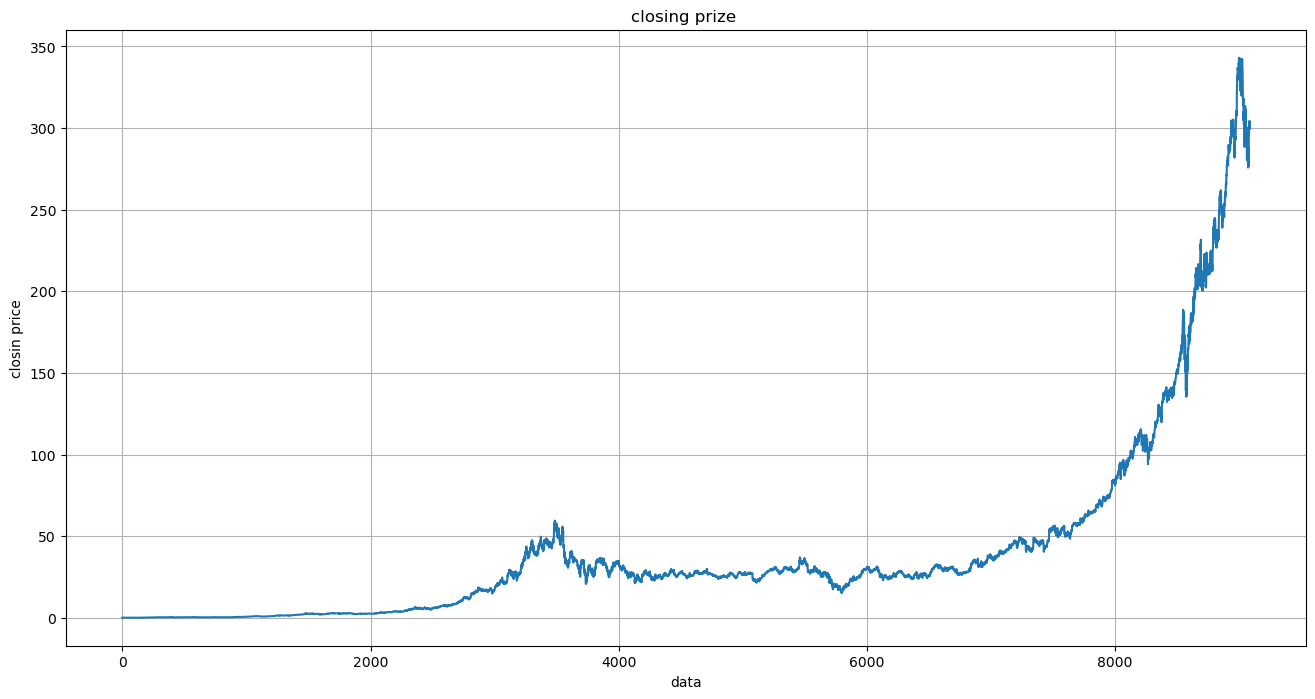

In [5]:
plt.figure(figsize = (16,8))
plt.title("closing prize ")
plt.plot(df['Close'])
plt.xlabel("data")
plt.ylabel("closin price")
plt.grid()
plt.show()


In [6]:
data = df.filter(['Close'])
dataset = data.values 
training_data = math.ceil(len(dataset)*0.8)
training_data

7267

In [7]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)
print("mean ",scaled_data.mean())
print("standard deviation",scaled_data.std())

mean  1.0013153162753806e-16
standard deviation 1.0


In [9]:
train_data = scaled_data[0:training_data,:]
train_data

array([[-0.69063008],
       [-0.69057193],
       [-0.69054284],
       ...,
       [ 0.08364206],
       [ 0.07225393],
       [ 0.0819673 ]])

In [10]:
x_train = []
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i])
    y_train.append(train_data[i])

In [ ]:
x_train

In [ ]:
y_train

In [15]:
x_train,y_train = np.array(x_train),np.array(y_train)

In [16]:
x_train.shape

(7207, 60, 1)

In [17]:
y_train.shape

(7207, 1)

In [18]:
#reshape 
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [20]:
x_train.shape

(7207, 60, 1)

In [23]:
model = Sequential()
model.add(LSTM(200,return_sequences= True,input_shape = (x_train.shape[1],1)))
model.add(LSTM(200,return_sequences = False))
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(1))

In [33]:
model.compile(optimizer ='adam',loss = 'mean_squared_error')

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 60, 200)           161600    
                                                                 
 lstm_2 (LSTM)               (None, 200)               320800    
                                                                 
 dense (Dense)               (None, 100)               20100     
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 507,601
Trainable params: 507,601
Non-trainable params: 0
_________________________________________________________________


In [37]:
history = model.fit(x_train,y_train,epochs =5)


Epoch 1/5
226/226 [==============================] - 40s 177ms/step - loss: 2.2381e-04
Epoch 2/5
226/226 [==============================] - 39s 173ms/step - loss: 1.9823e-04
Epoch 3/5
226/226 [==============================] - 45s 198ms/step - loss: 1.7907e-04
Epoch 4/5
226/226 [==============================] - 41s 180ms/step - loss: 1.6475e-04
Epoch 5/5
226/226 [==============================] - 37s 166ms/step - loss: 1.6025e-04


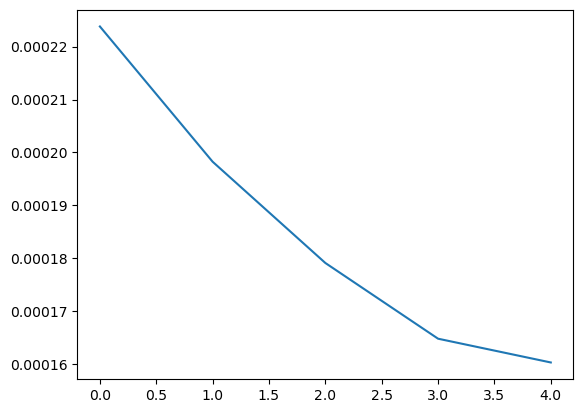

In [38]:
plt.plot(history.history['loss'])

In [43]:
test_data = scaled_data[training_data - 60:,:]
x_test = []
y_test =  dataset[training_data :,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

x_test = np.array(x_test)
x_test.shape

(1816, 60)

In [44]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [45]:
prediction = model.predict(x_test)
prediciton =scaler.inverse_transform(prediction)
print(prediction)

57/57 [==============================] - 3s 35ms/step
[[0.09543628]
 [0.10118909]
 [0.10738376]
 ...
 [3.924088  ]
 [3.9882967 ]
 [4.0153785 ]]
